# Laboratory Task 3 – Back Propagation

Instruction: Perform a forward and backward propagation in python using the inputs from Laboratory Task 2

In [15]:
# 1. Standard Imports
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 2. Define activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [17]:
# 3. Initialize parameters
x = np.array([1, 0, 1])
y_true = np.array([1])
lr = 0.1  # Increased for a more visible effect in the plot
hidden_weights = np.array([[0.2, 0.4, -0.5], [-0.3, 0.1, 0.2]])
hidden_biases = np.array([-0.4, 0.2])
output_weights = np.array([-0.3, -0.2])
output_bias = np.array([0.1])

# --- FORWARD PASS ---
# Calculate hidden layer input and activation
z_hidden = np.dot(hidden_weights, x) + hidden_biases
a_hidden = relu(z_hidden)

# Calculate output layer input and final prediction
z_output = np.dot(output_weights, a_hidden) + output_bias
y_pred = z_output

# Calculate the MSE loss
loss = 0.5 * (y_true - y_pred)**2

# --- BACKWARD PASS ---
# Gradient of the loss with respect to the prediction (d_L/d_ypred)
# The derivative of 0.5 * (y_pred - y_true)^2 is (y_pred - y_true)
d_loss_d_ypred = (y_pred - y_true)

# Gradients for the output layer
gradient_w_output = d_loss_d_ypred * a_hidden
gradient_b_output = d_loss_d_ypred * 1

# Propagate the error back to the hidden layer's activation (d_L/d_a_hidden)
d_loss_d_a_hidden = d_loss_d_ypred * output_weights.flatten()

# Propagate through the ReLU activation function (d_L/d_z_hidden)
d_loss_d_z_hidden = d_loss_d_a_hidden * relu_derivative(z_hidden)

# Gradients for the hidden layer weights (d_L/d_w_hidden)
# The order np.outer(d_loss_d_z_hidden, x) is crucial for the correct (2, 3) shape
gradient_w_hidden = np.outer(d_loss_d_z_hidden, x)
gradient_b_hidden = d_loss_d_z_hidden

# --- UPDATE WEIGHTS AND BIASES ---
output_weights_updated = output_weights - lr * gradient_w_output
output_bias_updated = output_bias - lr * gradient_b_output
hidden_weights_updated = hidden_weights - lr * gradient_w_hidden
hidden_biases_updated = hidden_biases - lr * gradient_b_hidden


In [18]:
# 4. Print results
print(f"Initial Prediction: {y_pred[0]:.4f}")
print(f"Initial Loss: {loss[0]:.4f}")
print("-" * 30)
print("Updated Hidden Weights:\n", hidden_weights_updated)
print("Updated Output Weights:\n", output_weights_updated)
print("Updated Hidden Biases:\n", hidden_biases_updated)
print("Updated Output Bias:\n", output_bias_updated)

Initial Prediction: 0.0800
Initial Loss: 0.4232
------------------------------
Updated Hidden Weights:
 [[ 0.2     0.4    -0.5   ]
 [-0.3184  0.1     0.1816]]
Updated Output Weights:
 [-0.3    -0.1908]
Updated Hidden Biases:
 [-0.4     0.1816]
Updated Output Bias:
 [0.192]


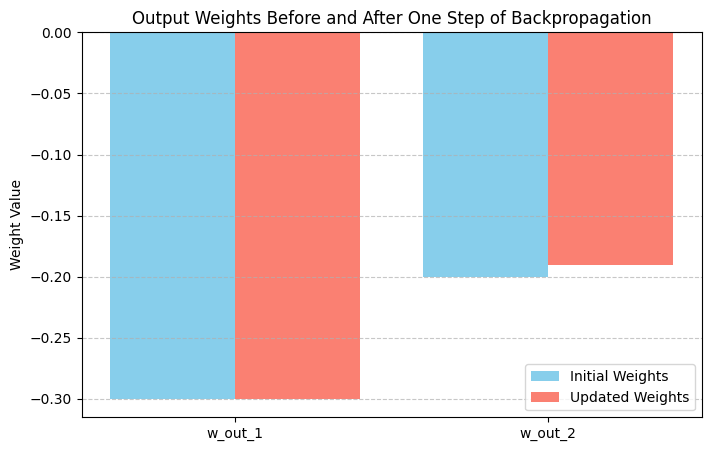

In [19]:
# 5. Visualization
labels = ['w_out_1', 'w_out_2']
x_axis = np.arange(len(labels))
plt.figure(figsize=(8, 5))
plt.bar(x_axis - 0.2, output_weights, 0.4, label='Initial Weights', color='skyblue')
plt.bar(x_axis + 0.2, output_weights_updated, 0.4, label='Updated Weights', color='salmon')
plt.xticks(x_axis, labels)
plt.ylabel("Weight Value")
plt.title("Output Weights Before and After One Step of Backpropagation")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Reflection
* **Backpropagation** is the core algorithm that allows a neural network to learn from its errors.

* It works by propagating the loss **backward** through the network to calculate the **gradient** for each weight and bias using the chain rule.

* These gradients measure how much each parameter contributed to the overall error.

* The bar chart visualization clearly shows the result: the weights are adjusted in a direction that will reduce the error. The size of this adjustment is controlled by the **learning rate**.